# (Ford GoBike System Data)
## by (ُEslam Abdelghany)

## Preliminary Wrangling
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
rides=pd.read_csv('201902-fordgobike-tripdata.csv')
rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Data Investigation

In [3]:
rides.shape      # to figure out the shape of the dataset 

(183412, 16)

In [4]:
# to check if the dataset has null values or not 
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

It turned out that the dataset includes null values in many columns 

In [5]:
rides.dropna(inplace=True)

In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [7]:
rides.describe() # it seems the duration column has no outliers that what we are interested in 

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Data wrangling
* Data cleaning 
* Generating new features 
* Converting data to the right format 

In [8]:
# Dropping the null values 
rides.dropna(inplace=True)

In [9]:
rides.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [10]:
# Converting the 'start_time' to datetime format 
rides['start_time']=pd.to_datetime(rides['start_time'])


In [11]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  object        
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [12]:
# Generation three more features User's Age, Start Hour, Start Day 
rides["Start Hour"]=rides['start_time'].dt.hour 
rides['Start Day']=rides['start_time'].dt.strftime('%A')
rides["User's Age"]=2021-rides['member_birth_year']

In [13]:
rides.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Start Hour,Start Day,User's Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Thursday,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,Thursday,49.0


In [14]:
'''
droping 'start_station_id', 'start_station_latitude','start_station_longitude',
'end_station_id', 'end_station_latitude','end_station_longitude','bike_id','member_birth_year'
'''
rides.drop(['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_id','member_birth_year'],axis=1,inplace=True)

In [54]:
rides['Start Day'] = pd.Categorical(rides['Start Day'], 
                      categories= order,
                      ordered=True)

In [55]:
rides.head(2)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,Start Hour,Start Day,User's Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,17,Thursday,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,12,Thursday,49.0


### What is the structure of your dataset?

> the dataset consists of 174952 non null values and 16 features 

### What is/are the main feature(s) of interest in your dataset?

I am interested in figuring out at what time of day and a year the larger number of rides are made. Does gender influence the number of rides and the duration? At what age category the greatest number of rides are made?  Does the user type affect the number of rides?
All of these questions I want to investigate so the features of interest will be:
'duration_sec', 'user_type', 'member_gender', 'user_age', 'start_hour', 'start_day'


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The duration 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [16]:
color='#154360'

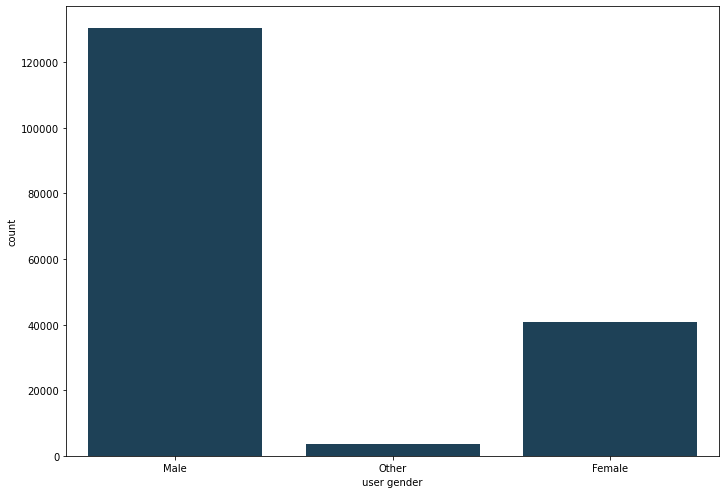

In [18]:
color='#154360'
# the count values of each gender 
plt.figure(figsize=[ 11.69, 8.27])
sns.countplot(data=rides,x='member_gender',color=color)
plt.xlabel('user gender');

The plot shows that the males make the greatest number of rides 

In [18]:
rides["User's Age"].describe()


count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: User's Age, dtype: float64

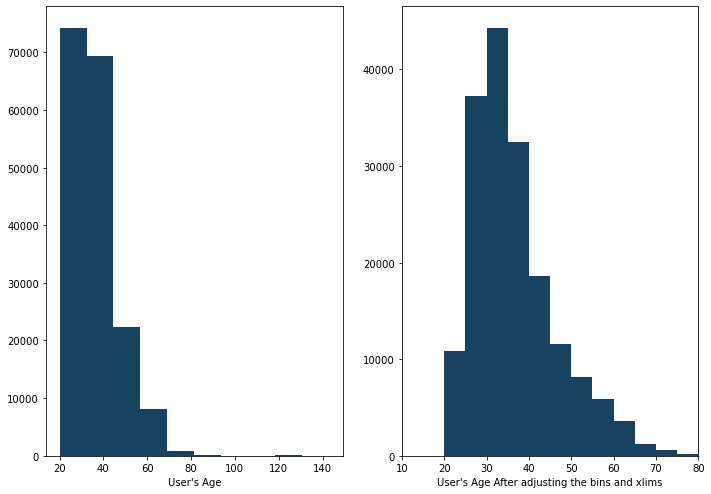

In [19]:
# let's see the ditribution of the user's age 
bins=np.arange(20,80+5,5)
plt.figure(figsize=[ 11.69, 8.27])
plt.subplot(1,2,1)
plt.hist(data=rides,x="User's Age",color=color);
plt.xlabel("User's Age")
plt.subplot(1,2,2)
plt.hist(data=rides,x="User's Age",color=color,bins=bins);
plt.xlabel("User's Age After adjusting the bins and xlims")
# it does not make sense start to the age from zero and the age that is above 80 is considered outlier 
plt.xlim((10,80));

In the first plot the data was right skewed and shows that the highest number of rides lies between 20 and 30. On the other hand, after adjusting the number of bins and the xlim, it is now clear that the greatest number of rides lies between 30 and 35.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

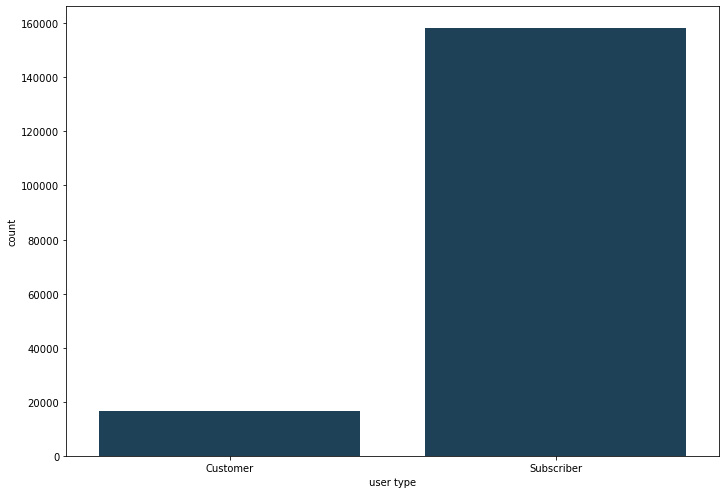

In [20]:
plt.figure(figsize=[ 11.69, 8.27])
sns.countplot(data=rides,x='user_type',color=color)
plt.xlabel('user type');

The subscribers make the biggest number of rides 

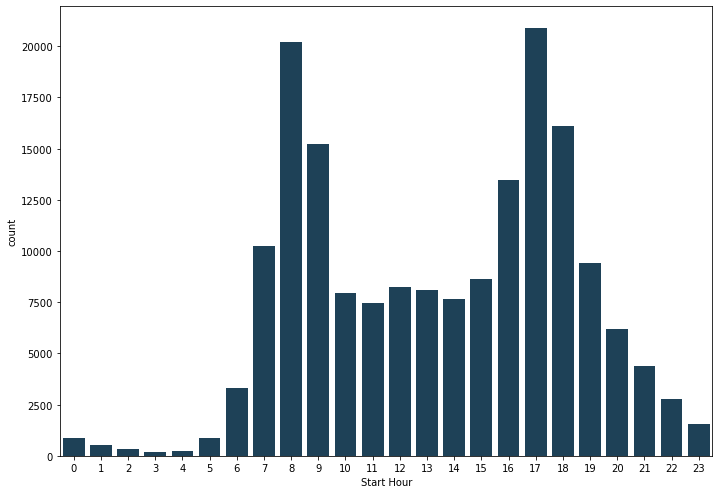

In [21]:
plt.figure(figsize=[ 11.69, 8.27])
sns.countplot(data=rides,x='Start Hour',color=color);
plt.xlabel("Start Hour");


 At 8 AM  and 5 PM the greatest number of rides are made.

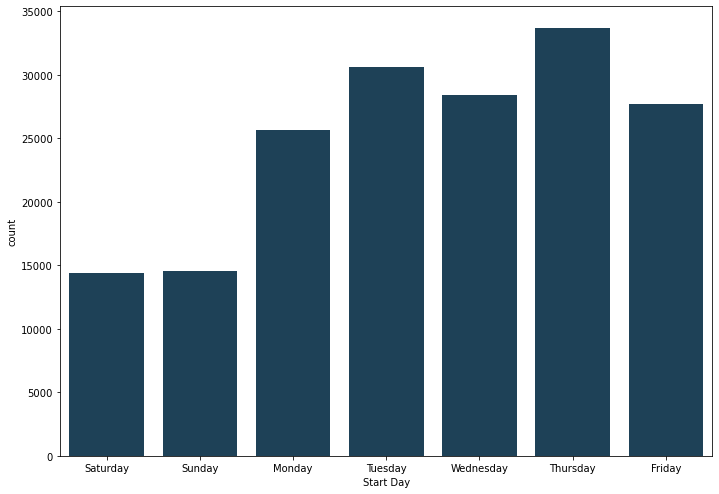

In [22]:
order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
plt.figure(figsize=[ 11.69, 8.27])
sns.countplot(data=rides,x='Start Day',color=color,order=order);
plt.xlabel("Start Day");

On Thursday the greatest number of rides are made.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
There were no unusual points except for the age columns that showed outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In the age plot, there were outliers and the data was right-skewed. So I had to adjust the bins and the xlim to get a clear plot that shows the right insights.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

C:\Users\Eslam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


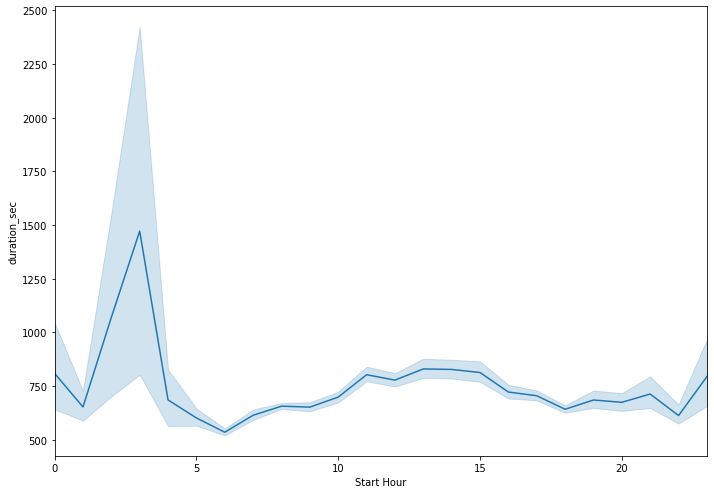

In [23]:
plt.figure(figsize=[ 11.69, 8.27])
sns.lineplot(rides['Start Hour'],rides['duration_sec'])
plt.xlim((0,23));

the longest durations are made at the first five hours of day

In [24]:
rides.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'Start Hour', 'Start Day', 'User's Age'],
      dtype='object')

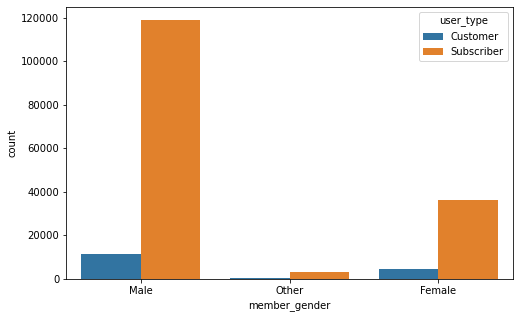

In [31]:
plt.figure(figsize=[ 8, 5])
sns.countplot(x="member_gender", hue="user_type", data=rides);


The males who are sunscribers make the biggest number of rides

C:\Users\Eslam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


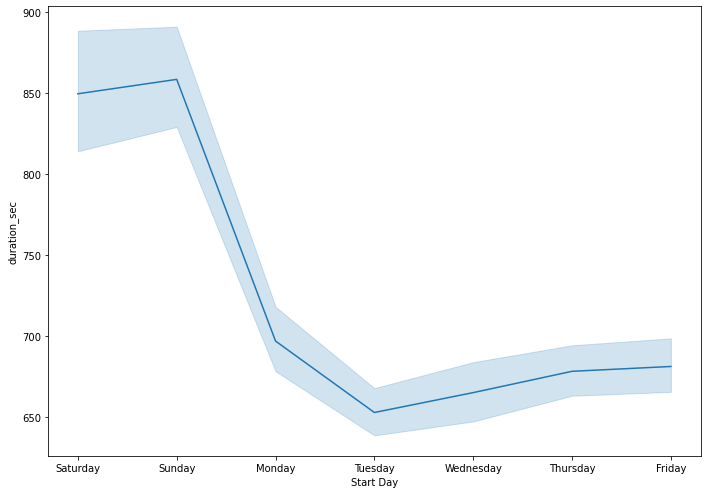

In [58]:

order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
plt.figure(figsize=[ 11.69, 8.27])
sns.lineplot(rides['Start Day'],rides['duration_sec']);




The logest durations are made on Sunday and Saturday. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> the duration varies when the day and hour changes. It seems that the longest durations are made in the first five hours of day in the weekend espcially. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\Eslam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


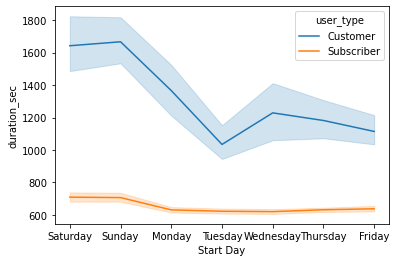

In [59]:
sns.lineplot(rides['Start Day'],rides['duration_sec'],hue=rides['user_type']);

The duration of subscribers is longer than that of customers over the weekdays

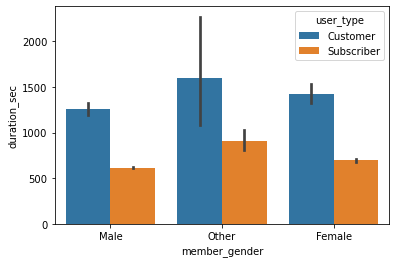

In [60]:
sns.barplot(x="member_gender",y='duration_sec', hue="user_type", data=rides);

The customer gender makes the longest durations.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

 The duration of subscribers is longer than that of customers, and the customer gender makes the longest durations. 
### Were there any interesting or surprising interactions between features?

> yes the gender other makes more duration although the males make the greatest number of rides

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [61]:
rides.to_csv('df.csv',index=False)